# Proactive Churn Management.

In [2]:
import numpy as np
import pandas as pd
import csv

In [91]:
#Reading the CSV File Here
df=pd.read_csv("C:\\Users\\hp\\Downloads\\Churn.csv")
df["Churn"]=df["Churn"].map({'Yes':1,'No':0})

In [92]:
#Checking the Types of the predictors
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [111]:
df.iloc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                              0
Name: 0, dtype: object

# Data cleaning including missing values, outliers and multi-collinearity.

In [121]:
df.dtypes
s=df.stack(dropna=False)
final=pd.to_numeric(s,errors='coerce').unstack()

In [123]:
final

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.85,29.85,0.0
1,NaN,NaN,0.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.95,1889.50,0.0
2,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.85,108.15,1.0
3,NaN,NaN,0.0,NaN,NaN,45.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.30,1840.75,0.0
4,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,NaN,0.0,NaN,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.80,1990.50,0.0
7039,NaN,NaN,0.0,NaN,NaN,72.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.20,7362.90,0.0
7040,NaN,NaN,0.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.60,346.45,0.0
7041,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.40,306.60,1.0


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


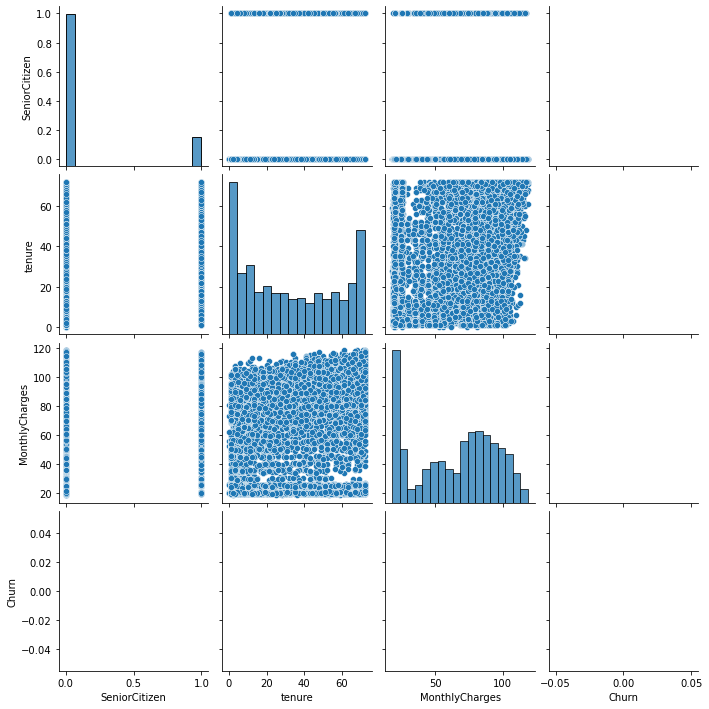

In [40]:
sns.pairplot(df)


In [41]:
x=df.corr()


# HeatMap For Correlation

<AxesSubplot:>

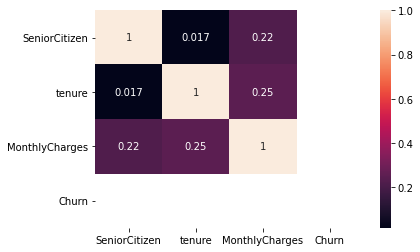

In [42]:
sns.heatmap(x,annot=True)

# NO MISSING VALUES FOUND

<AxesSubplot:>

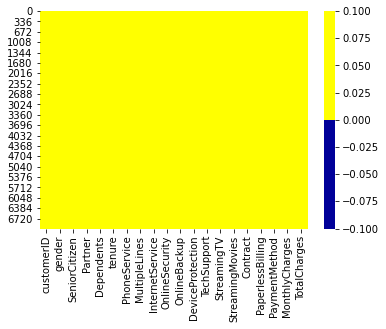

In [43]:
cols=df.columns[:20]
colors=["#000099","#ffff00"]
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors))

<AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>

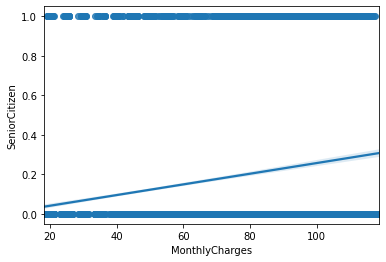

In [44]:
sns.regplot(x="MonthlyCharges",y="SeniorCitizen",data=df)

In [45]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [46]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [47]:
df['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

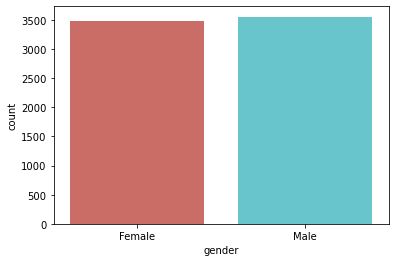

<Figure size 432x288 with 0 Axes>

In [48]:
sns.countplot(x='gender',data=df,palette="hls")
plt.show()
plt.savefig("Gender_Plot")

# CHURN RATE

In [49]:
churn_rate_percent= 1869/7043*100
print(churn_rate_percent,end=" %")

26.536987079369588 %

In [50]:
df.groupby('gender').mean()

,SeniorCitizen,tenure,MonthlyCharges,Churn
gender,,,,
Female,0.162844,32.244553,65.204243,NaN
Male,0.161463,32.495359,64.327482,NaN


Text(0, 0.5, 'Number of People')

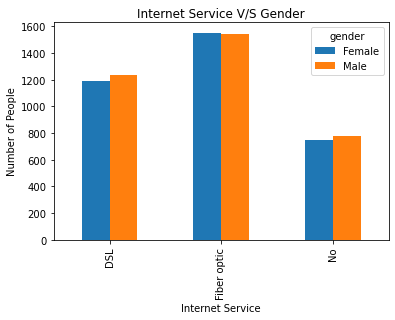

In [51]:
pd.crosstab(df.InternetService,df.gender).plot(kind='bar')
plt.title("Internet Service V/S Gender")
plt.xlabel("Internet Service")
plt.ylabel("Number of People")

# Using Highly Correlated Predictors

In [125]:
y=final['Churn']
cols=['tenure','MonthlyCharges']
X=final[cols]

In [126]:
X_train,X_text,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [127]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [128]:
X_train.head()
y_train.dtypes
X_train.dtypes

tenure            float64
MonthlyCharges    float64
dtype: object

In [130]:
X_train.dtypes

tenure            float64
MonthlyCharges    float64
dtype: object

# Using Random Forest Classifier

In [129]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_text)

In [131]:
from sklearn import metrics

# Accuracy

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7463322290582111


In [37]:
import os

In [38]:
os.getcwd()

'C:\\Users\\hp'

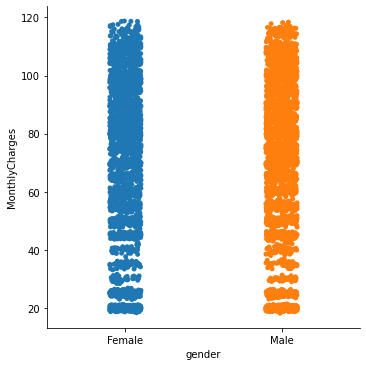

In [22]:
sns.catplot(x="gender",y="MonthlyCharges",data=df)

# Feature Importance

Feature: 0, Score: 0.32674
Feature: 1, Score: 0.67326


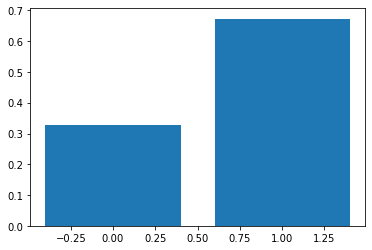

In [136]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#End Of Notebook

Analysis :
    
    1. The Loyal Customers must be alotted some sort of discount on services provided by their ISP
    
    2. Certain Schemes must be executed inorder to avoid rate of unsubscription for new Customers 
    (Ex : 10 GB free for the first 30 days)
    
    3. Further more, the Cluster Analysis can point out the pattern in the rate of unsubscription 
    (Ex : Considering plans that yield the most Churn Rate (They should be reviewed))